<a href="https://colab.research.google.com/github/Neersha/Machine-learning/blob/main/EM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_excel("EM test.xlsx")
df.head()

,Age
0,1340
1,1519
2,1640
3,1477
4,1329


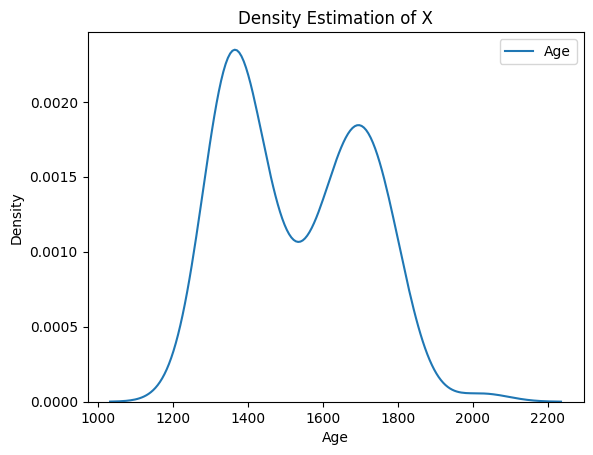

In [6]:
sns.kdeplot(df)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.show()

In [7]:
mu1_hat, sigma1_hat = np.mean(df), np.std(df)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [8]:
pi1_hat= len(df)

In [9]:
num_epochs = 20
log_likelihoods = []

for epoch in range(num_epochs):
    # E-step: Compute responsibilities
    gamma1 = pi1_hat * norm.pdf(df, mu1_hat, sigma1_hat)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


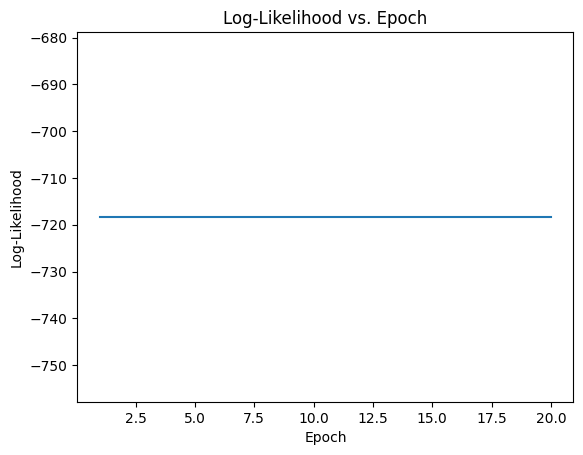

In [10]:
# Perform EM algorithm for 20 epochs
num_epochs = 20
log_likelihoods = []

for epoch in range(num_epochs):
	# E-step: Compute responsibilities
	gamma1 = pi1_hat * norm.pdf(df, mu1_hat, sigma1_hat)

	total = gamma1
	gamma1 /= total


	# M-step: Update parameters
	mu1_hat = np.sum(gamma1 * df) / np.sum(gamma1)
	sigma1_hat = np.sqrt(np.sum(gamma1 * (df - mu1_hat)**2) / np.sum(gamma1))

	pi1_hat = np.mean(gamma1)

	# Compute log-likelihood
	log_likelihood = np.sum(np.log(pi1_hat * norm.pdf(df, mu1_hat, sigma1_hat)))
	log_likelihoods.append(log_likelihood)

# Plot log-likelihood values over epochs
plt.plot(range(1, num_epochs+1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Epoch')
plt.show()


In [11]:
from scipy import stats
import scipy.stats.kde as kde
from scipy.stats import gaussian_kde

In [12]:
# Plot the final estimated density
df_sorted = np.sort(df)
density_estimation = pi1_hat*norm.pdf(df_sorted,mu1_hat,sigma1_hat)


plt.plot(df_sorted, gaussian_kde(df_sorted)(df_sorted), color='green', linewidth=2)
plt.plot(df_sorted, density_estimation, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Estimation of Age')
plt.legend(['Kernel Density Estimation','Mixture Density'])
plt.show()


ValueError: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.

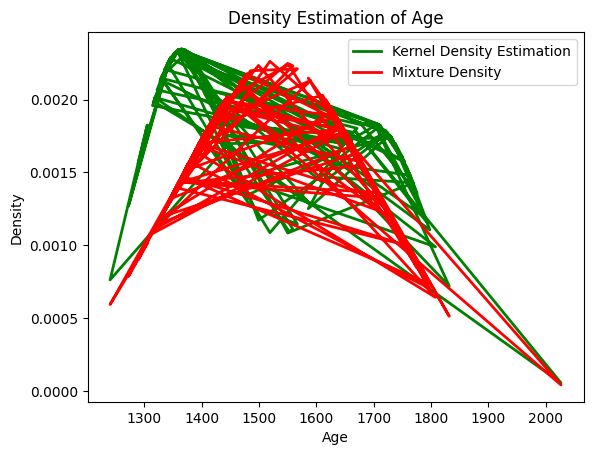

In [13]:
# Plot the final estimated density
df_sorted = np.sort(df)
density_estimation = pi1_hat*norm.pdf(df_sorted,mu1_hat,sigma1_hat)

# Reshape df_sorted to be a 1D array for gaussian_kde
df_sorted_2d = df_sorted.ravel()

plt.plot(df_sorted, gaussian_kde(df_sorted_2d)(df_sorted_2d), color='green', linewidth=2)
plt.plot(df_sorted, density_estimation, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Estimation of Age')
plt.legend(['Kernel Density Estimation','Mixture Density'])
plt.show()

(array([ 1.,  0.,  1.,  1.,  4.,  6.,  9., 12.,  3.,  3.,  4.,  1.,  5.,
         1.,  1.,  3.,  1.,  1.,  0.,  2.,  2.,  1.,  1.,  2.,  2.,  6.,
         4.,  3.,  2.,  6.,  2.,  5.,  4.,  3.,  1.,  3.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1240.  , 1255.74, 1271.48, 1287.22, 1302.96, 1318.7 , 1334.44,
        1350.18, 1365.92, 1381.66, 1397.4 , 1413.14, 1428.88, 1444.62,
        1460.36, 1476.1 , 1491.84, 1507.58, 1523.32, 1539.06, 1554.8 ,
        1570.54, 1586.28, 1602.02, 1617.76, 1633.5 , 1649.24, 1664.98,
        1680.72, 1696.46, 1712.2 , 1727.94, 1743.68, 1759.42, 1775.16,
        1790.9 , 1806.64, 1822.38, 1838.12, 1853.86, 1869.6 , 1885.34,
        1901.08, 1916.82, 1932.56, 1948.3 , 1964.04, 1979.78, 1995.52,
        2011.26, 2027.  ]),
 <BarContainer object of 50 artists>)

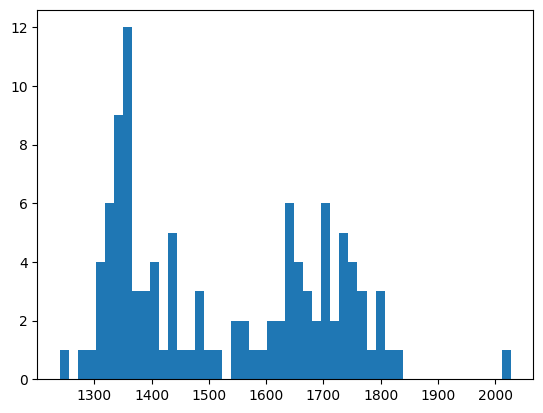

In [14]:
plt.hist(df, bins=50)

In [15]:
from sklearn.mixture import GaussianMixture

In [16]:
df_reshaped = df.values.reshape((len(df),1))

In [18]:
model=GaussianMixture(n_components=2, init_params='k-means++')
model.fit(df)

GaussianMixture(init_params='k-means++', n_components=2)

In [19]:
y1=model.predict(df)
print(y1)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1
 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0]
